In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

In [21]:
def parse_date(date):
    return datetime.datetime.fromtimestamp(float(date))

In [ ]:
##data available on kaggle - https://www.kaggle.com/mczielinski/bitcoin-historical-data/downloads/bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv
    
raw_data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv", parse_dates = True, date_parser = parse_date, index_col = 'Timestamp')

In [7]:
raw_data.shape

(3045857, 8)

In [23]:
raw_data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [34]:
raw_data.isnull().any()

Open                 False
High                 False
Low                  False
Close                False
Volume_(BTC)         False
Volume_(Currency)    False
Weighted_Price       False
dtype: bool

In [35]:
data = raw_data.drop(['Volume_(BTC)','Volume_(Currency)','Weighted_Price'],1)

In [39]:
data.describe()

,Open,High,Low,Close
count,3.045857e+06,3.045857e+06,3.045857e+06,3.045857e+06
mean,5.892415e+02,5.896265e+02,5.888079e+02,5.892375e+02
std,8.829786e+02,8.836372e+02,8.821788e+02,8.829554e+02
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00
25%,1.013700e+02,1.015200e+02,1.011700e+02,1.014500e+02
50%,3.625000e+02,3.627500e+02,3.622200e+02,3.625000e+02
75%,6.319900e+02,6.322100e+02,6.316200e+02,6.319900e+02
max,5.846430e+03,5.846430e+03,5.839640e+03,5.844400e+03


In [49]:
signal_lookback = 60 * 24 * 60 # days * hours * minutes
print(signal_lookback)

# here's our signal columns
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

86400


In [50]:
data.head()

,Open,High,Low,Close,Buy,Sell
Timestamp,,,,,,
2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.0,0.0
2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.0,0.0
2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.0,0.0
2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.0,0.0
2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.0,0.0


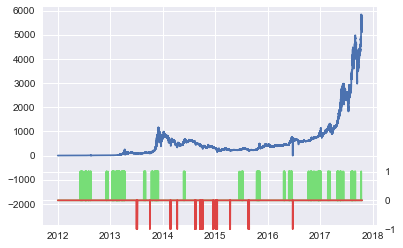

In [61]:
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

# this is our 'working out', you could collapse these into the .loc call later on and save memory 
# but I've left them in for debug purposes, makes it easier to see what is going on
data['RollingMax'] = data['Close'].shift(1).rolling(signal_lookback, min_periods=signal_lookback).max()
data['RollingMin'] = data['Close'].shift(1).rolling(signal_lookback, min_periods=signal_lookback).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1

data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

# lets now take a look and see if its doing something sensible
import matplotlib
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(1,1)
ax1.plot(data['Close'])
y = ax1.get_ylim()
ax1.set_ylim(y[0] - (y[1]-y[0])*0.4, y[1])

ax2 = ax1.twinx()
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.1],[0.9,0.32]]))
ax2.plot(data['Buy'], color='#77dd77')
ax2.plot(data['Sell'], color='#dd4444')

In [65]:
data['Sell'].value_counts()

 0.0    3045240
-1.0        617
Name: Sell, dtype: int64